# Full Logistic Regression Model for Game by Game Analysis Using Seasonal Statistics 

In [21]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

df = pd.read_csv("/home/swisnoski/nba_predictor_development/models/data/combined_data_2010-2023.csv")
df['TEAM_1_WIN/LOSS'] = df['TEAM_1_WIN/LOSS'].replace({100: 1, 0: 0})

X = df[[
        "TEAM_1_HOME/AWAY",
        "TEAM_1_PTS",
        "TEAM_1_FGA",
        "TEAM_1_FG_PCT",
        "TEAM_1_OREB",
        "TEAM_1_DREB",
        "TEAM_1_AST",
        "TEAM_1_TOV",
        "TEAM_1_WIN_PCT",
        "TEAM_2_HOME/AWAY",
        "TEAM_2_PTS",
        "TEAM_2_FGA",
        "TEAM_2_FG_PCT",
        "TEAM_2_OREB",
        "TEAM_2_DREB",
        "TEAM_2_AST",
        "TEAM_2_TOV",
        "TEAM_2_WIN_PCT",
    ]]  
y = df['TEAM_1_WIN/LOSS']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.fillna(1, inplace=True)
model = LogisticRegression(max_iter=20000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



accuracy is 0.6857743097238895
mae is 0.31422569027611047
recall is 0.6857743097238895
precision is 0.6857796672436222
r2 is -0.2569915254237287
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69      1680
         1.0       0.68      0.68      0.68      1652

    accuracy                           0.69      3332
   macro avg       0.69      0.69      0.69      3332
weighted avg       0.69      0.69      0.69      3332



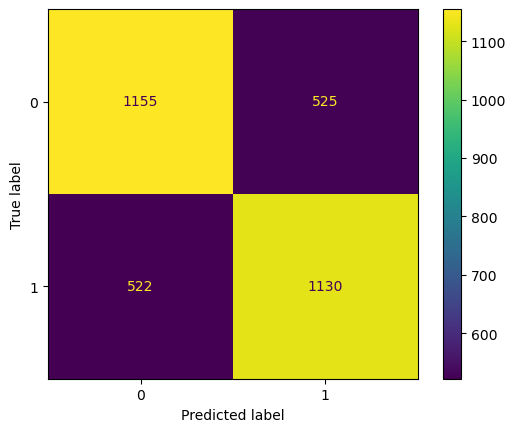

In [22]:
import sklearn.metrics as metrics
print('accuracy is ' + str(metrics.accuracy_score(y_test, y_pred)))
print('mae is ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('recall is ' + str(metrics.recall_score(y_test, y_pred, average='weighted')))
print('precision is ' + str(metrics.precision_score(y_test, y_pred, average='weighted')))
print('r2 is ' + str(metrics.r2_score(y_test, y_pred)))


report = metrics.classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(report)

#confusion matrix
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
disp.plot()
plt.show()